## Name: Nguyen Minh Huy Duong
### Assignment 1

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('used_cars_data.csv')
dataset.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 1. Data cleaning

In [3]:
# Remove the "S.No." and "New_Price" columns
dataset.drop(labels=["S.No.", "New_Price"], axis=1, inplace=True)
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
# Create "Car_Age" column
from datetime import datetime
current_year = datetime.now().year
dataset["Car_Age"] = current_year - dataset["Year"]
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [5]:
# Find the 2 vehicle with missing Mileage
dataset.query('Mileage != Mileage')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


According to carwale.com (https://www.carwale.com/mahindra-cars/verito/15-d4-bs-iv/#:~:text=Mahindra%20Verito%201.5%20D4%20BS%2DIV%20Summary&text=7.70%20Lakh.,a%20mileage%20of%2021%20kmpl.) the Mileage of Mahindra E Verito D4 is 21kmpl \
According to fueleconomy.gov (https://www.fueleconomy.gov/feg/Find.do?action=sbs&id=30919) the Mileage of Toyota Prius 2011 is 48 MPG equal to 20.41 kmpl \
All the car as same model and year should have similar Mileage

In [6]:
new_mileage = [[4446, "21 kmpl"], [4904, "20.41 kmpl"]]
for data in new_mileage:
    dataset.loc[data[0], 'Mileage'] = data[1]
dataset.query('Fuel_Type == "Electric"')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,21 kmpl,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,20.41 kmpl,1798 CC,73 bhp,5.0,12.75,13


### 2. Transformation

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [8]:
# Split Mileage, Engine and Power column into pair of column Value and Unit
temp_dataset = dataset.copy()
temp_dataset[['Mileage Value', 'Mileage Unit']] = temp_dataset['Mileage'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset[['Engine Value', 'Engine Unit']] = temp_dataset['Engine'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset[['Power Value', 'Power Unit']] = temp_dataset['Power'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage Value,Mileage Unit,Engine Value,Engine Unit,Power Value,Power Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14,26.6,km/kg,998,CC,58.16,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9,19.67,kmpl,1582,CC,126.2,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13,18.2,kmpl,1199,CC,88.7,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12,20.77,kmpl,1248,CC,88.76,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11,15.2,kmpl,1968,CC,140.8,bhp


In [9]:
temp_dataset['Mileage Unit'].value_counts()

Mileage Unit
kmpl     7179
km/kg      74
Name: count, dtype: int64

In [10]:
temp_dataset['Engine Unit'].value_counts()

Engine Unit
CC    7207
Name: count, dtype: int64

In [11]:
temp_dataset['Power Unit'].value_counts()

Power Unit
bhp    7078
Name: count, dtype: int64

From the result only Mileage have more than 1 type of Unit which are "kmpl" and "km/kg" \
Since the number of data in "kmpl" is way more than "km/kg", we will convert the data into "kmpl" to minimize the number of calculation

In [12]:
dataset['Mileage'] = np.where(temp_dataset['Mileage Unit'] == 'km/kg',
                              temp_dataset['Mileage Value'].astype(float) * 1.4,
                              temp_dataset['Mileage Value'].astype(float))

dataset['Engine'] = np.where(pd.notnull(temp_dataset['Engine Value']), 
                             temp_dataset['Engine Value'].astype(float), 
                             np.nan)

dataset['Power'] = np.where(pd.notnull(temp_dataset['Power Value']), 
                             temp_dataset['Power Value'].astype(float), 
                             np.nan)


dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11


In [13]:
dataset['Seats'].dtype

dtype('float64')

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


### 3. Outlier dection and box-plot

In [15]:
# list of column to work on
col_list = ["Car_Age", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price"]

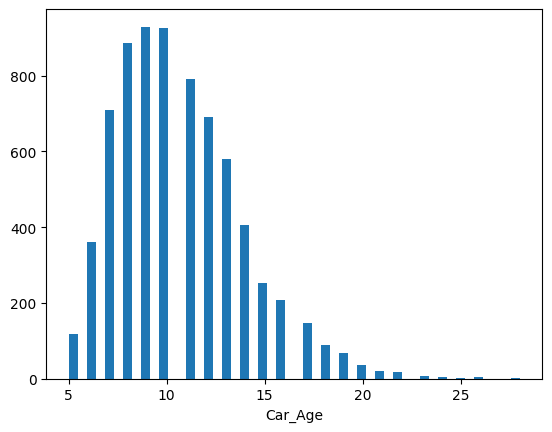

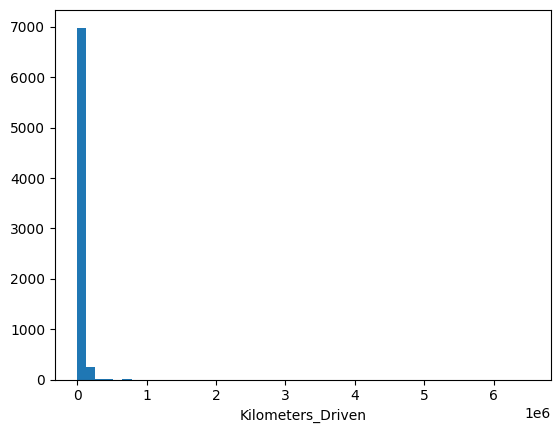

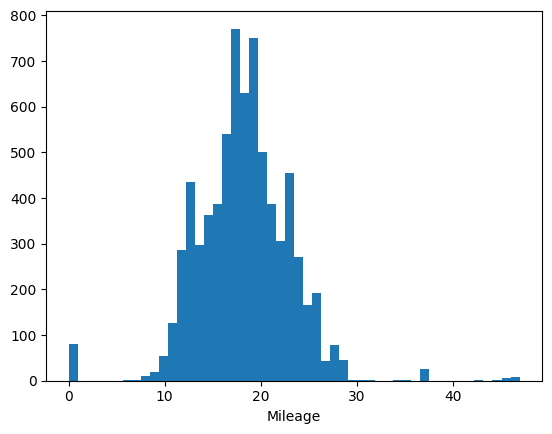

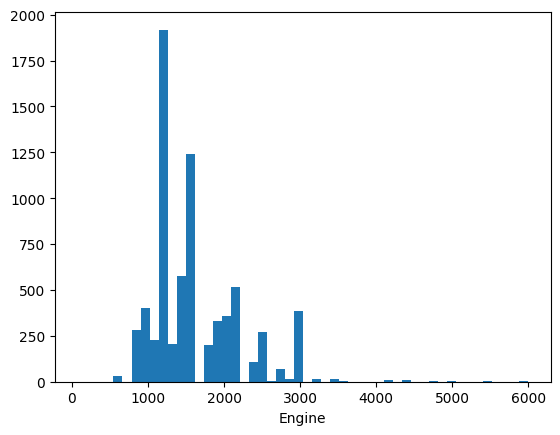

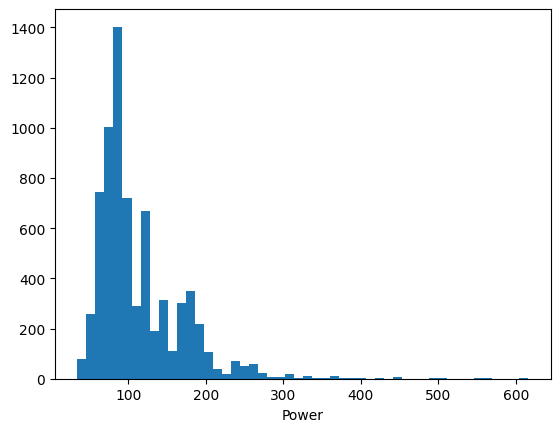

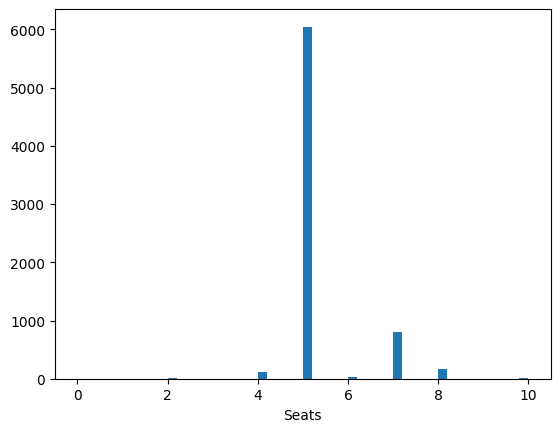

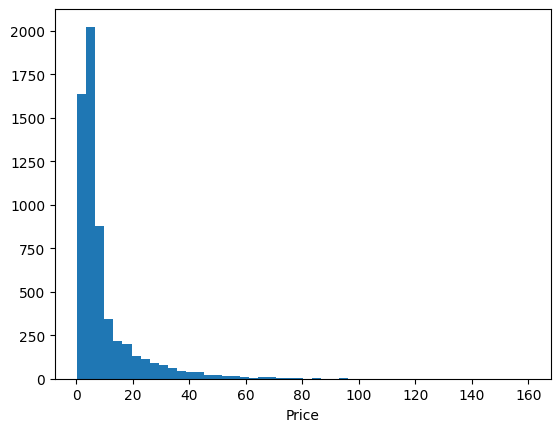

In [16]:
from math import sqrt
for col in col_list:
    bin = (dataset[col].max() - dataset[col].min()) / sqrt(dataset[col].count())
    plt.hist(dataset[col], bins=50)
    plt.xlabel(col)
    plt.show()

After observe the graph of "Car_Age", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price", Non of these are normal distribution

In [17]:
# Calculate the mean and standard deviation of each column
summary_stats = pd.DataFrame({
    "Mean": dataset[col_list].mean(),
    "Std": dataset[col_list].std(),
    "25th": (first:=dataset[col_list].quantile(0.25)),
    "75th": (third:=dataset[col_list].quantile(0.75)),
    "IQR": (IQR:=(third - first)),
    "Lower Limit": first - 1.5 * IQR,
    "Upper Limit": third + 1.5 * IQR
})
summary_stats


,Mean,Std,25th,75th,IQR,Lower Limit,Upper Limit
Car_Age,10.634634,3.254421,8.00,13.00,5.00,0.500,20.500
Kilometers_Driven,58699.063146,84427.720583,34000.00,73000.00,39000.00,-24500.000,131500.000
Mileage,18.241666,4.839427,15.26,21.10,5.84,6.500,29.860
Engine,1616.573470,595.285137,1198.00,1968.00,770.00,43.000,3123.000
Power,112.765214,53.493553,75.00,138.10,63.10,-19.650,232.750
Seats,5.279722,0.811660,5.00,5.00,0.00,5.000,5.000
Price,9.479468,11.187917,3.50,9.95,6.45,-6.175,19.625


In [18]:
outlier_count = {"Column": [], "Number of Outlier":[]}
for col in col_list:
    less_than_lower = len(dataset[dataset[col] < summary_stats.loc[col, "Lower Limit"]])
    greater_than_upper = len(dataset[dataset[col] > summary_stats.loc[col, "Upper Limit"]])
    outlier_count["Column"].append(col)
    outlier_count["Number of Outlier"].append(less_than_lower + greater_than_upper)
outlier = pd.DataFrame(outlier_count).set_index("Column")
outlier.index.name = None
outlier

,Number of Outlier
Car_Age,58
Kilometers_Driven,258
Mileage,133
Engine,65
Power,273
Seats,1153
Price,718


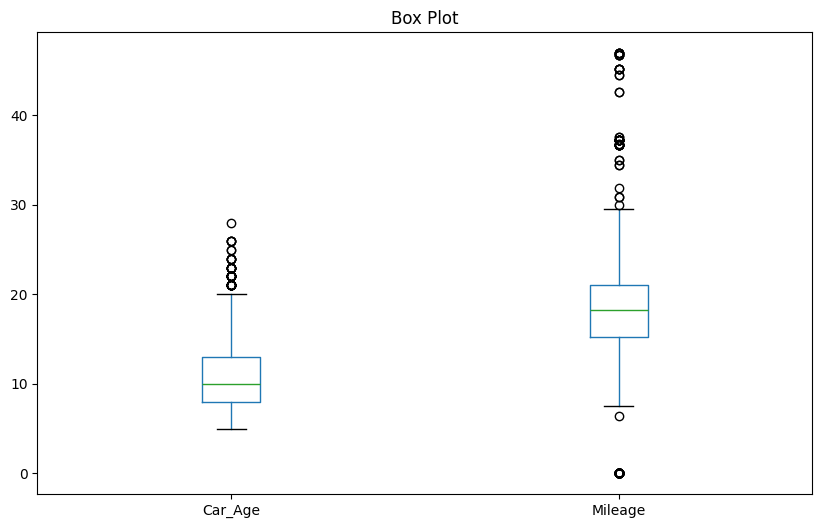

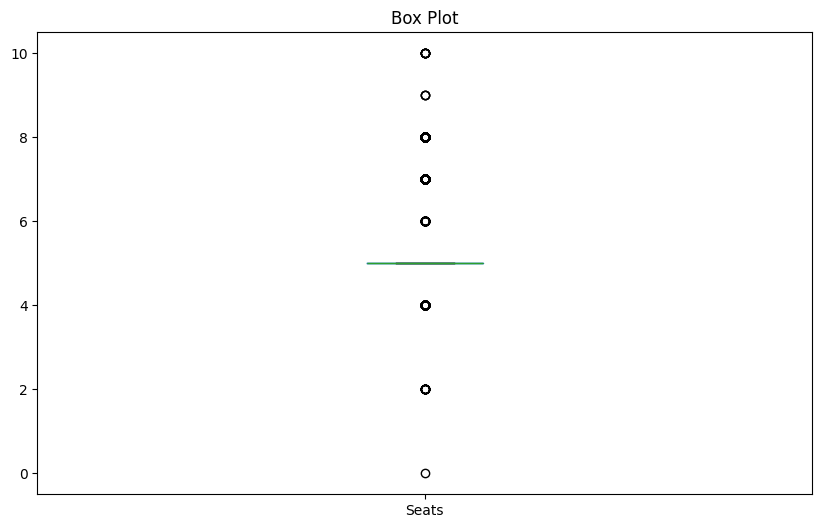

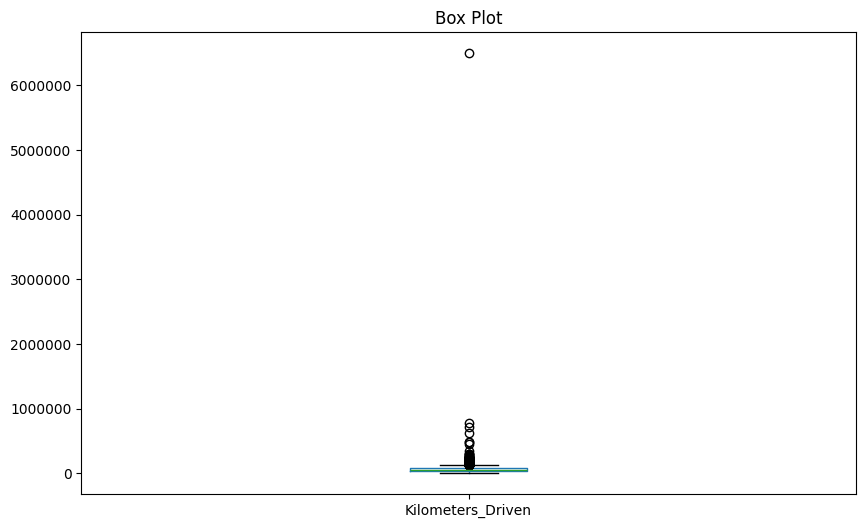

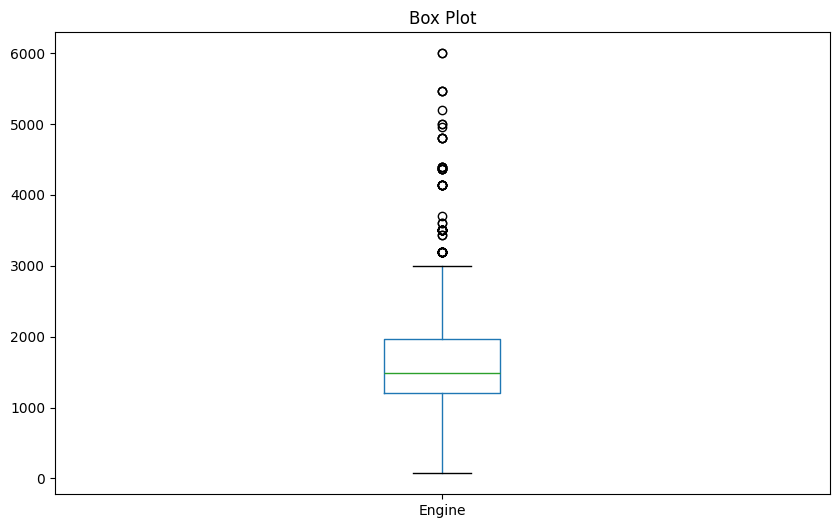

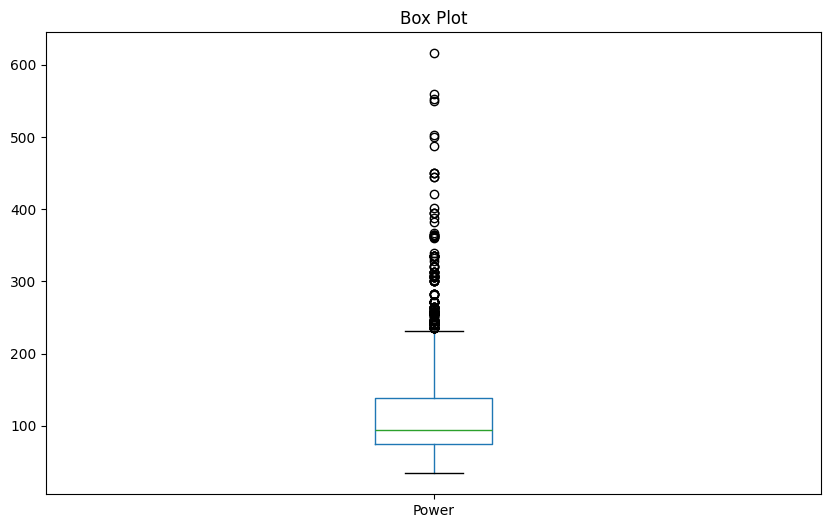

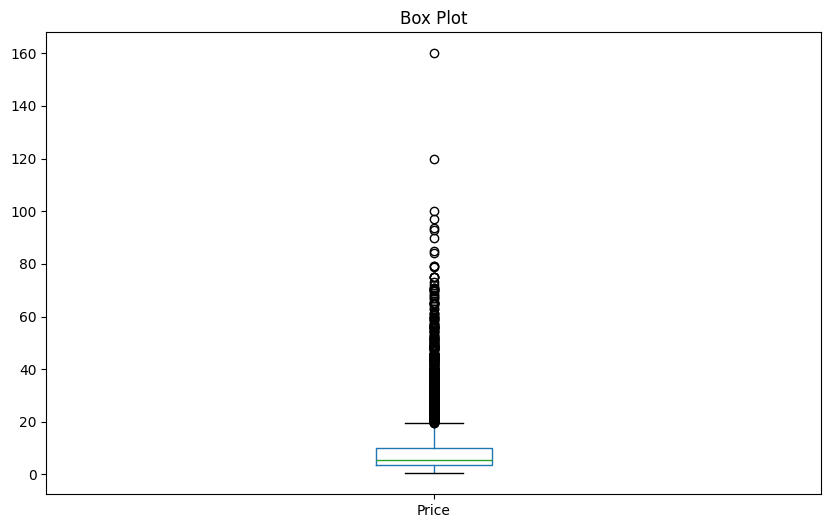

In [19]:
# Draw box plot
cols = [["Car_Age", "Mileage"], "Seats", "Kilometers_Driven","Engine", "Power","Price"]
for col in cols:
    plt.figure(figsize=(10, 6))
    dataset.boxplot(column=col)
    plt.title("Box Plot")
    plt.grid(False)
    plt.ticklabel_format(style='plain', axis='y')
    # plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

C:\Users\minhh\AppData\Local\Temp\ipykernel_25560\3656307016.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=fuel_types)


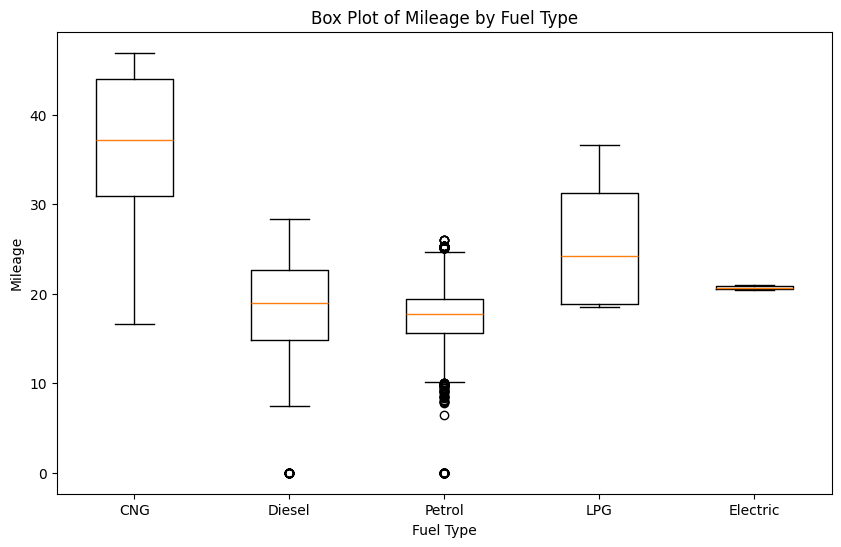

In [20]:
# Group Fuel type and mileage
fuel_types = dataset['Fuel_Type'].unique()
data = [dataset[dataset['Fuel_Type'] == fuel]['Mileage'] for fuel in fuel_types]
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=fuel_types)
plt.title('Box Plot of Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.show()

### 4. Pearson correlation coeffocoemt and scatter plot

In [21]:
# list of column to work on
col_list = ["Seats", "Car_Age", "Kilometers_Driven", "Mileage", "Engine", "Power", "Price"]

In [22]:
# form pairs
pairs = []
for i in range(len(col_list) - 1):
    for j in range(i + 1, len(col_list)):
        pairs.append([col_list[i], col_list[j]])
pairs

[['Seats', 'Car_Age'],
 ['Seats', 'Kilometers_Driven'],
 ['Seats', 'Mileage'],
 ['Seats', 'Engine'],
 ['Seats', 'Power'],
 ['Seats', 'Price'],
 ['Car_Age', 'Kilometers_Driven'],
 ['Car_Age', 'Mileage'],
 ['Car_Age', 'Engine'],
 ['Car_Age', 'Power'],
 ['Car_Age', 'Price'],
 ['Kilometers_Driven', 'Mileage'],
 ['Kilometers_Driven', 'Engine'],
 ['Kilometers_Driven', 'Power'],
 ['Kilometers_Driven', 'Price'],
 ['Mileage', 'Engine'],
 ['Mileage', 'Power'],
 ['Mileage', 'Price'],
 ['Engine', 'Power'],
 ['Engine', 'Price'],
 ['Power', 'Price']]

In [23]:
def exclude_outlier(data: pd.DataFrame, col) -> pd.DataFrame:
    limit = summary_stats.iloc[:, -2:]
    lower_bound, upper_bound = limit.loc[col]
    result = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return result

In [24]:
def calculate_correlation(data: pd.DataFrame, pair):
    x, y = pair
    x_mean, x_std = data[x].mean(), data[x].std()
    y_mean, y_std = data[y].mean(), data[y].std()
    if x_std == 0 or y_std == 0:
        return np.nan
    covariance = (1/len(data)) * np.sum((data[x] - x_mean) * (data[y] - y_mean))
    result = covariance/(x_std * y_std)
    return result


Since remove outlier for seats would cause the standard deviation equal 0, we will not remove outlier for seats

                    x                  y  corr(x,y)
0               Seats            Car_Age  -0.009087
1               Seats  Kilometers_Driven   0.171630
2               Seats            Mileage  -0.346258
3               Seats             Engine   0.456932
4               Seats              Power   0.187556
5               Seats              Price   0.266190
6             Car_Age  Kilometers_Driven   0.508794
7             Car_Age            Mileage  -0.301596
8             Car_Age             Engine   0.053714
9             Car_Age              Power  -0.018951
10            Car_Age              Price  -0.348097
11  Kilometers_Driven            Mileage  -0.136035
12  Kilometers_Driven             Engine   0.173289
13  Kilometers_Driven              Power   0.064809
14  Kilometers_Driven              Price  -0.070584
15            Mileage             Engine  -0.640662
16            Mileage              Power  -0.535741
17            Mileage              Price  -0.254140
18          

C:\Users\minhh\AppData\Local\Temp\ipykernel_25560\361723454.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


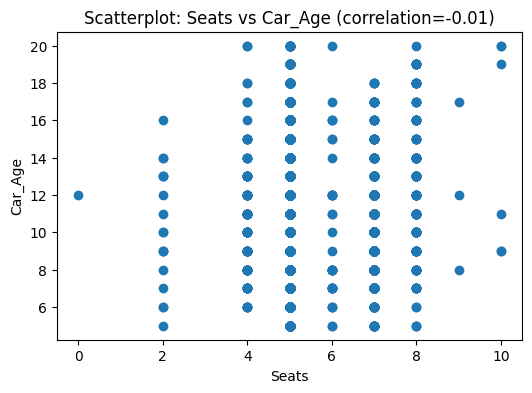

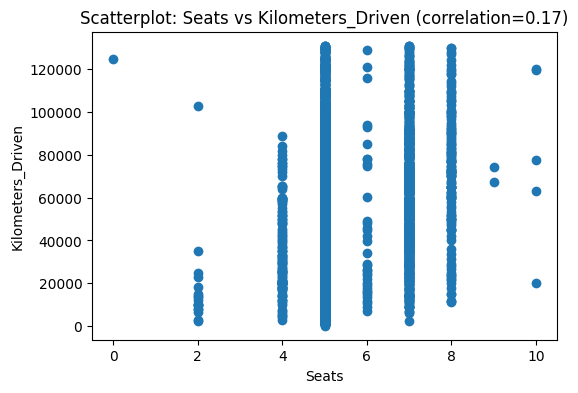

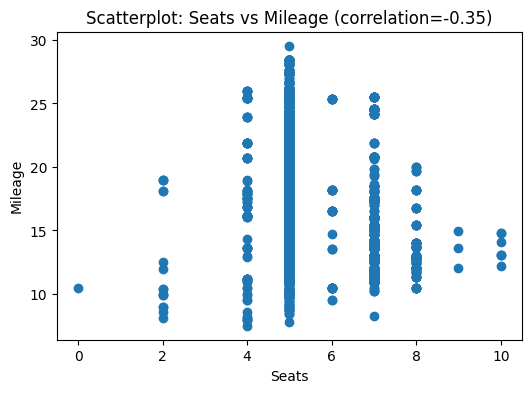

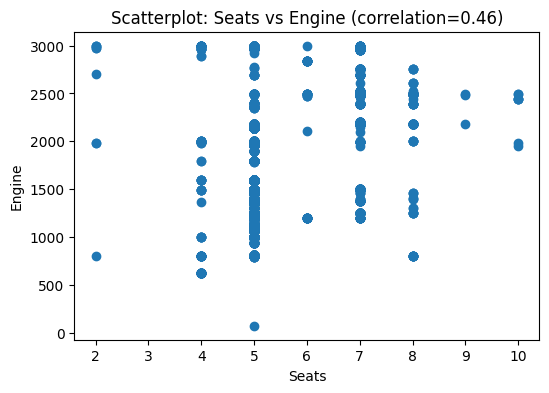

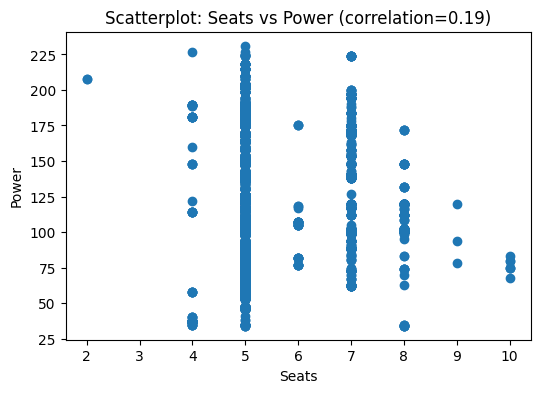

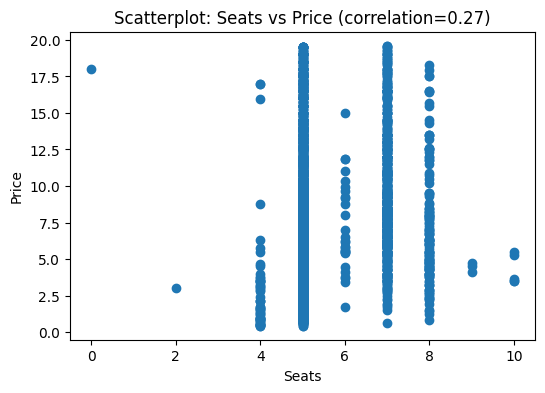

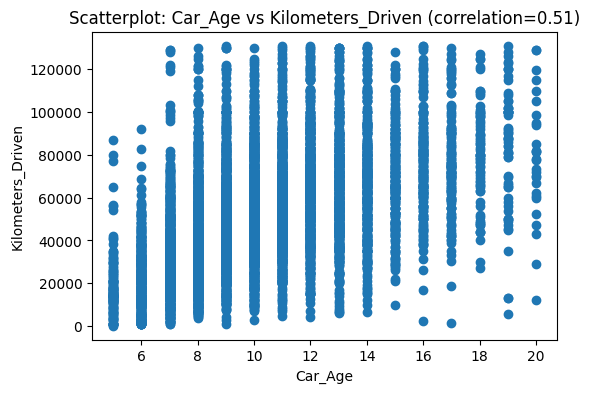

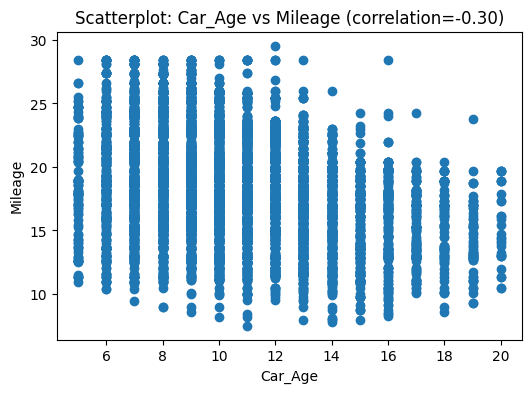

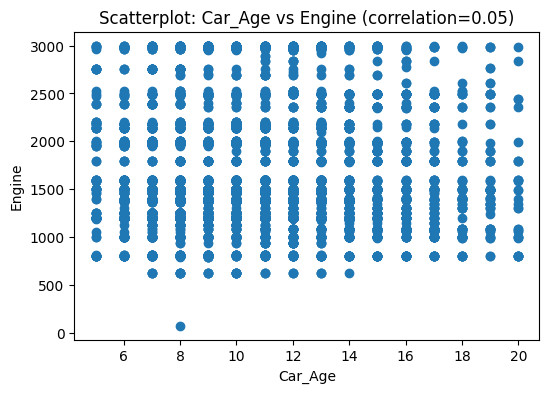

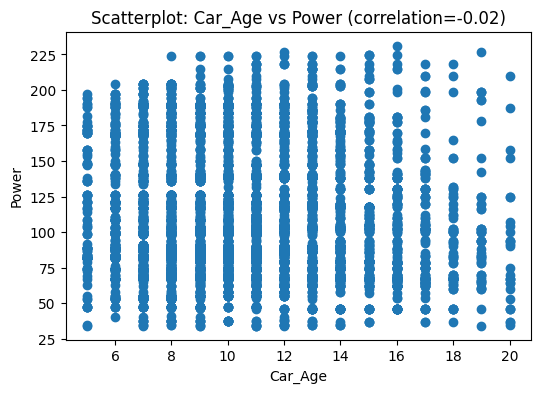

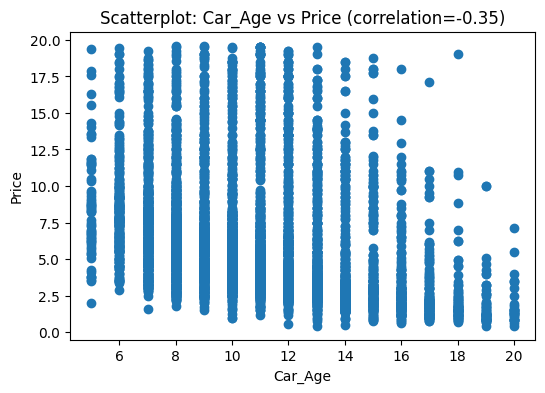

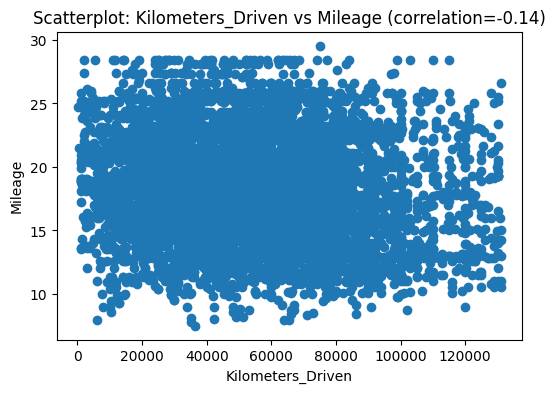

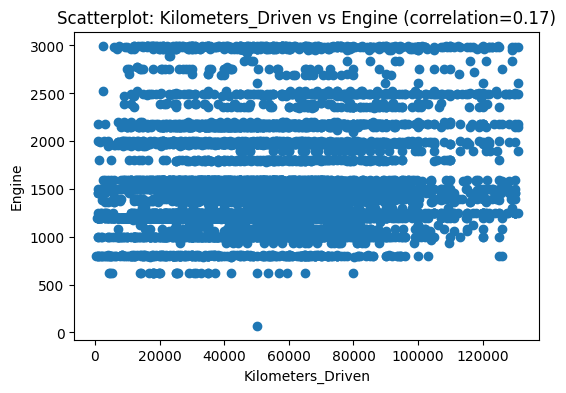

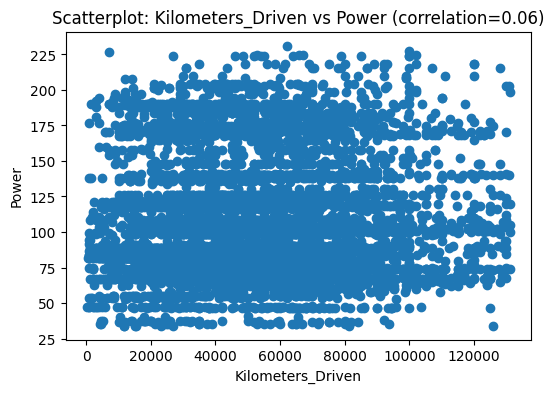

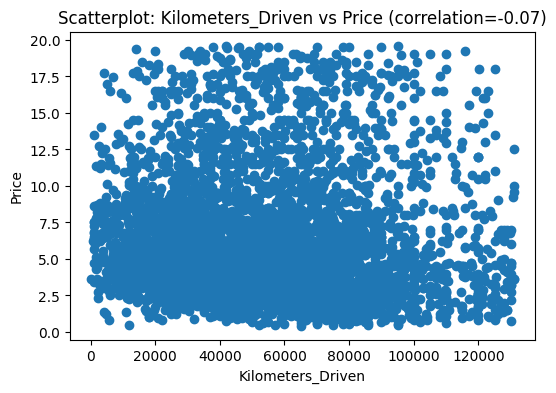

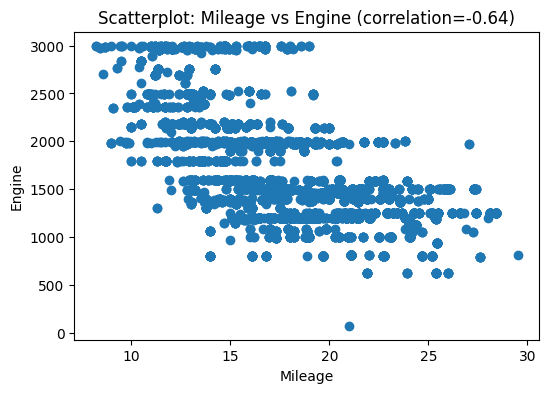

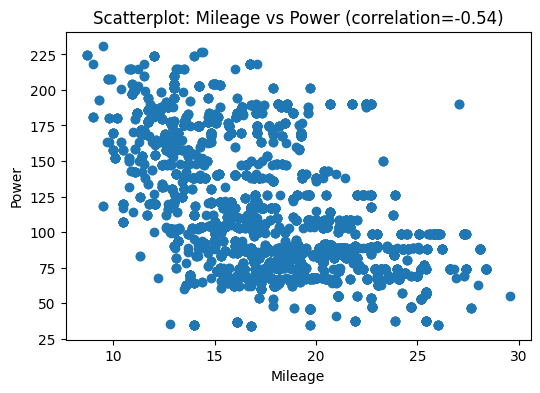

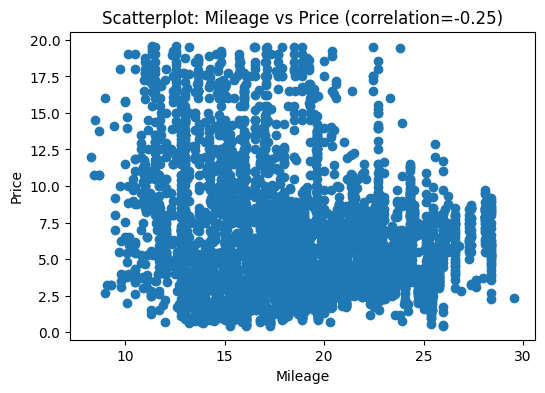

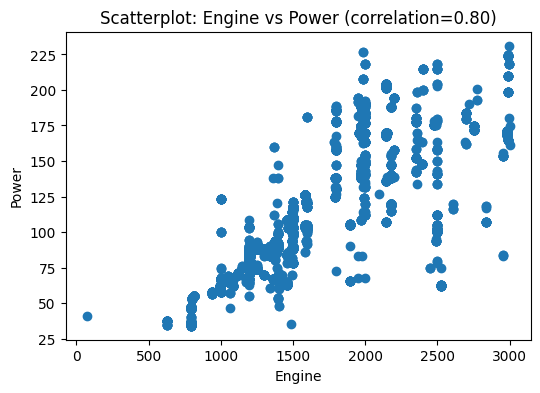

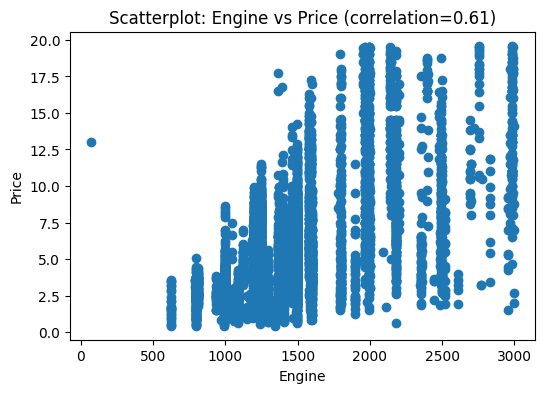

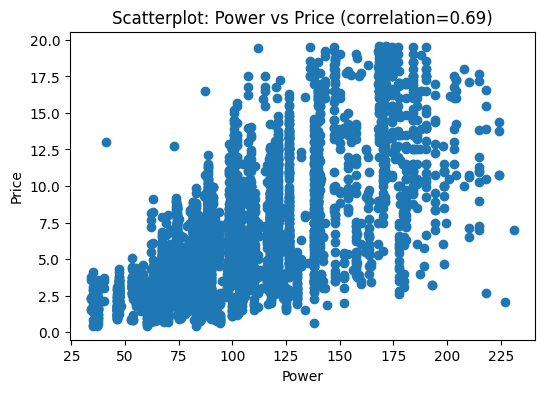

In [25]:
correlation_dict = {"x": [], "y": [], "corr(x,y)": []}
for pair in pairs:
    clean_data = dataset.copy()
    # Exclude outlier, we know seats always as index 0
    if pair[0] != 'Seats':
        clean_data = exclude_outlier(dataset, pair[0])
    clean_data = exclude_outlier(clean_data, pair[1])

    result = calculate_correlation(clean_data, pair)
    correlation_dict["x"].append(pair[0])
    correlation_dict["y"].append(pair[1])
    correlation_dict["corr(x,y)"].append(result)
    plt.figure(figsize=(6,4))
    plt.scatter(clean_data[pair[0]], clean_data[pair[1]])
    plt.title(f'Scatterplot: {pair[0]} vs {pair[1]} (correlation={result:.2f})')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

correlation_table = pd.DataFrame(correlation_dict)
print(correlation_table)
plt.show()


### 5. Handling missing values

In [26]:
# List of column working on
col_list = ["Mileage", "Engine", "Power", "Seats", "Price"]
imputed_dataset = dataset.copy()
# Split the Name column into Brand and Model
imputed_dataset['Brand'] = imputed_dataset['Name'].str.split().str[0] # 1st word
imputed_dataset['Model'] = imputed_dataset['Name'].str.split().str[1:].apply(' '.join) # reaming words

imputed_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11,Audi,A4 New 2.0 TDI Multitronic


In [27]:
def convert_outlier_to_missing(data, col):
    limit = summary_stats.iloc[:, -2:]
    lower_bound, upper_bound = limit.loc[col]
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), np.nan, data[col])

In [28]:
def check_missing_value(dataset, col_list):
    missing_value_count = pd.DataFrame({
        "Number of Missing Value": dataset[col_list].isnull().sum()
    })
    print(missing_value_count)

In [29]:
def imputed_by_subgroup(dataset, column, subgroup, method):
    if method == "mean":
        dataset[column] = dataset.groupby(subgroup)[column].transform(lambda x: x.fillna(x.mean()))
    elif method == "mode":
        dataset[column] = dataset.groupby(subgroup)[column].transform(lambda x: x.fillna(x.mode(dropna=False)[0]))
    return dataset

In [30]:
def draw_histogram(dataset, col):
    plt.figure(figsize=(8, 6))
    original = dataset[dataset[f"{col}_imputed"] == False][col]
    imputed = dataset[dataset[f"{col}_imputed"] == True][col]
    plt.hist(original, bins=10, color='blue', label='Original')
    plt.hist(imputed, bins=10, color='orange', label='Imputed')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.legend()
    plt.show()

Create extra rows to indicate if the data is original or imputed \
True : Imputed\
False: Original

In [31]:
for col in col_list:
    convert_outlier_to_missing(imputed_dataset, col)
    imputed_dataset[f'{col}_imputed'] = imputed_dataset[col].isnull()


Engine and Seats are discrete features => using mode \
Power are continuous features => using mean \
We will group value base on Fuel Type

In [32]:
imputed_dataset = imputed_by_subgroup(imputed_dataset, "Engine", "Brand", "mode")
imputed_dataset = imputed_by_subgroup(imputed_dataset, "Engine", "Model", "mode")

imputed_dataset = imputed_by_subgroup(imputed_dataset, "Seats", "Brand", "mode")
imputed_dataset = imputed_by_subgroup(imputed_dataset, "Seats", "Model", "mode")

imputed_dataset = imputed_by_subgroup(imputed_dataset, "Power", "Brand", "mean")
imputed_dataset = imputed_by_subgroup(imputed_dataset, "Power", "Model", "mean")
check_missing_value(imputed_dataset, ["Engine", "Seats", "Power"])


        Number of Missing Value
Engine                        3
Seats                       707
Power                        24


Apply global constant to handle the remaining missing value \
Chosing mean or mode of the whole dataset to prevent distort the meaning of the data

In [33]:
imputed_dataset["Power"] = imputed_dataset["Power"].transform(lambda x: x.fillna(x.mean()))
imputed_dataset["Engine"] = imputed_dataset["Engine"].transform(lambda x: x.fillna(x.mode(dropna=False)[0]))
imputed_dataset["Seats"] = imputed_dataset["Seats"].transform(lambda x: x.fillna(x.mode(dropna=False)[0]))
check_missing_value(imputed_dataset, ["Engine", "Seats", "Power"])


        Number of Missing Value
Engine                        0
Seats                         0
Power                         0


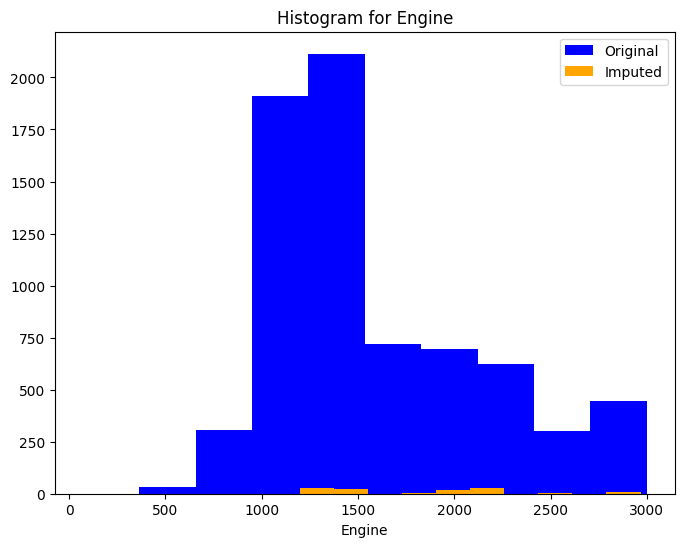

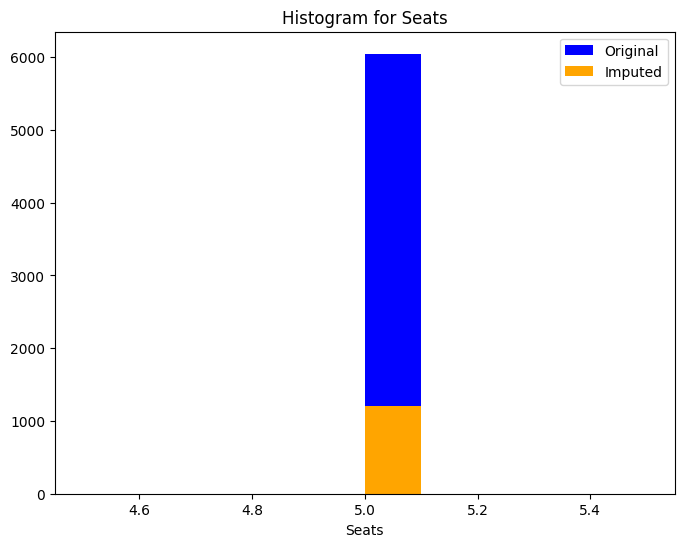

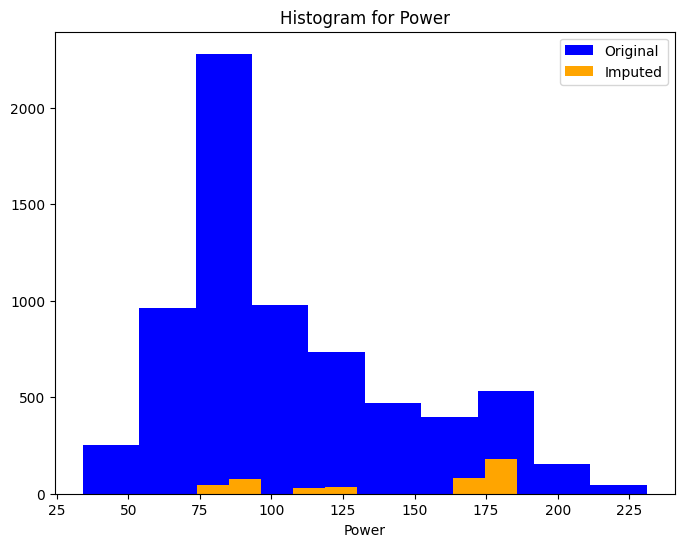

In [34]:
for col in ["Engine", "Seats", "Power"]:
    draw_histogram(imputed_dataset, col)

In [35]:
# find the highest correlation
filter_correlation = correlation_table[(correlation_table['x'] == 'Mileage') | (correlation_table['y'] == 'Mileage') |
                                       (correlation_table['x'] == 'Price') | (correlation_table['y'] == 'Price')]
filter_correlation = filter_correlation.dropna()
filter_correlation

,x,y,"corr(x,y)"
2,Seats,Mileage,-0.346258
5,Seats,Price,0.266190
7,Car_Age,Mileage,-0.301596
10,Car_Age,Price,-0.348097
11,Kilometers_Driven,Mileage,-0.136035
14,Kilometers_Driven,Price,-0.070584
15,Mileage,Engine,-0.640662
16,Mileage,Power,-0.535741
17,Mileage,Price,-0.254140
19,Engine,Price,0.609040


From observation we will pick 2 pair `Power - Price` and `Mileage - Engine`

In [36]:
from sklearn.linear_model import LinearRegression

def linear_regression_imputation(dataset, col1, col2):
    mileage_data = dataset[[col1, col2]].dropna()
    X_mileage = mileage_data.iloc[:, :-1].astype(float)
    y_mileage = mileage_data.iloc[:, -1]
    
    model_mileage = LinearRegression()
    model_mileage.fit(X_mileage, y_mileage)
    missing_mileage_indices = imputed_dataset[imputed_dataset[col2].isnull()].index
    dataset.loc[missing_mileage_indices, col2] = model_mileage.predict(dataset.loc[missing_mileage_indices, [col1]])

linear_regression_imputation(imputed_dataset, "Engine", "Mileage")
linear_regression_imputation(imputed_dataset, "Power", "Price")

check_missing_value(imputed_dataset, ["Mileage", "Price"])

         Number of Missing Value
Mileage                        0
Price                          0


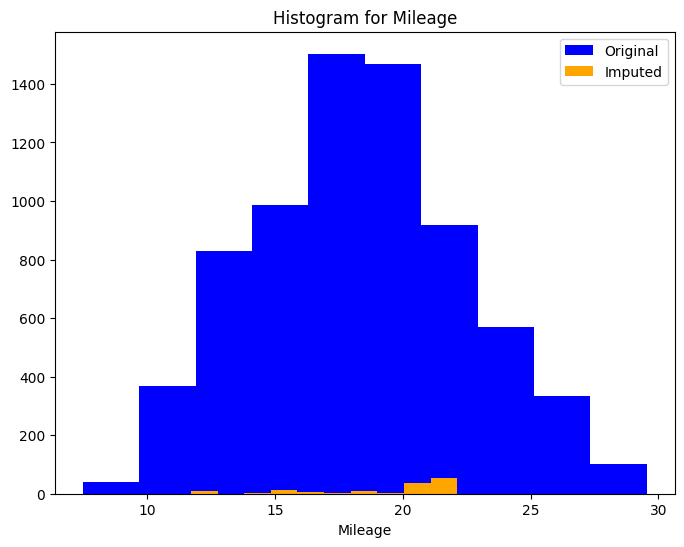

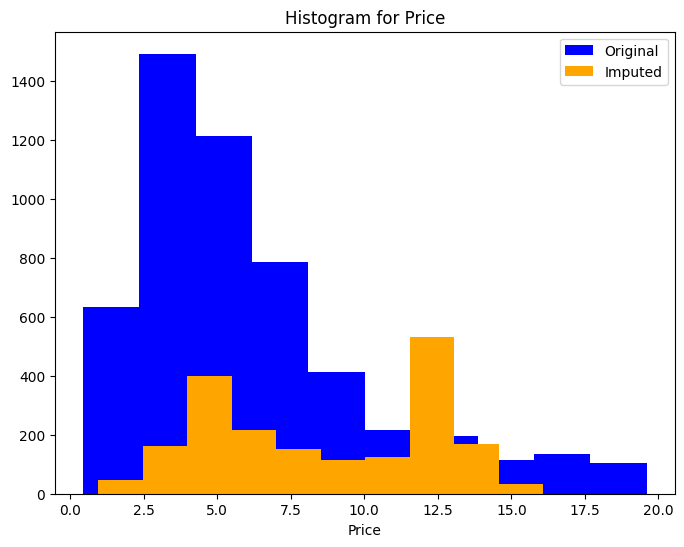

In [37]:
for col in ["Mileage", "Price"]:
    draw_histogram(imputed_dataset, col)